In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

/Users/canoe/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Âä†ËΩΩÂπ∂È¢ÑÂ§ÑÁêÜÊï∞ÊçÆ

In [2]:
# Âä†ËΩΩËÆ≠ÁªÉÈõÜÊï∞ÊçÆ
data_paths = {
    "ÁªèÊµé": "ÁªèÊµétrain.csv",
    "ÂÜõ‰∫ã": "ÂÜõ‰∫ãtrain.csv",
    "ÁßëÊäÄ": "ÁßëÊäÄtrain.csv",
    "Á§æ‰ºö": "Á§æ‰ºötrain.csv",
    "‰ΩìËÇ≤": "‰ΩìËÇ≤train.csv",
    "ÊñáÂåñ": "ÊñáÂåñtrain.csv",
    "ÊîøÊ≤ª": "ÊîøÊ≤ªtrain.csv"
}

In [3]:
df_list = []
for label, path in data_paths.items():
    df = pd.read_csv(path)
    df['Area'] = label  # Ê∑ªÂä†Á±ªÂà´Ê†áÁ≠æÂàó
    df_list.append(df)

In [4]:
# ÂêàÂπ∂ÊâÄÊúâÊï∞ÊçÆ
df = pd.concat(df_list, ignore_index=True)

In [5]:
# Êü•ÁúãÊï∞ÊçÆÊ¶ÇÂÜµ
print(df.head())

  Area               KeyWords             Name Verified Language  \
0   ÁªèÊµé  high-speed rail china  XIE Yongjun Ëß£ÂãáÂÜõ        f       en   
1   ÁªèÊµé  high-speed rail china  XIE Yongjun Ëß£ÂãáÂÜõ        f       en   
2   ÁªèÊµé  high-speed rail china  XIE Yongjun Ëß£ÂãáÂÜõ        f       en   
3   ÁªèÊµé  high-speed rail china  XIE Yongjun Ëß£ÂãáÂÜõ        f       en   
4   ÁªèÊµé  high-speed rail china  XIE Yongjun Ëß£ÂãáÂÜõ        f       en   

                                           Content Unnamed: 6 Unnamed: 7  \
0  High-speed rail here and there in China (37/46)        NaN        NaN   
1  High-speed rail here and there in China (36/46)        NaN        NaN   
2  High-speed rail here and there in China (35/46)        NaN        NaN   
3  High-speed rail here and there in China (34/46)        NaN        NaN   
4  High-speed rail here and there in China (33/46)        NaN        NaN   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0   

# ÊñáÊú¨È¢ÑÂ§ÑÁêÜ‰∏éÁâπÂæÅÊèêÂèñ

In [6]:
# Êü•ÁúãÊòØÂê¶Â≠òÂú®Áº∫Â§±ÂÄº
print(df.isnull().sum())

# Âà†Èô§ÂåÖÂê´Áº∫Â§±ÂÄºÁöÑË°å
df = df.dropna(subset=['Content'])

# Â¶ÇÊûú‰Ω†ÊÉ≥Â°´ÂÖÖÁº∫Â§±ÂÄºÔºà‰æãÂ¶ÇÔºåÂ°´ÂÖÖÁ©∫Â≠óÁ¨¶‰∏≤ÔºâÔºåÂèØ‰ª•‰ΩøÁî®‰∏ãÈù¢ÁöÑÊñπÊ≥ï
# df['Content'] = df['Content'].fillna('')

Area               0
KeyWords           0
Name             460
Verified           5
Language           1
Content            1
Unnamed: 6     53845
Unnamed: 7     70169
Unnamed: 8     76185
Unnamed: 9     78201
Unnamed: 10    78911
Unnamed: 11    79215
Unnamed: 12    79336
Unnamed: 13    79402
Unnamed: 14    79436
Unnamed: 15    79451
Unnamed: 16    79462
Unnamed: 17    79464
Unnamed: 18    79467
Unnamed: 19    79468
Unnamed: 20    79469
Unnamed: 21    79469
Unnamed: 22    79470
Unnamed: 23    79470
Unnamed: 24    79470
dtype: int64


In [7]:
# Á°Æ‰øùÊâÄÊúâÂÜÖÂÆπÂàóÈÉΩÊòØÂ≠óÁ¨¶‰∏≤Á±ªÂûã
df['Content'] = df['Content'].astype(str)

In [8]:
# Â∞ÜÊñáÊú¨Êï∞ÊçÆËΩ¨Âåñ‰∏∫TF-IDFÁâπÂæÅ
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # ÈôêÂà∂ÊúÄÂ§ö5000‰∏™ÁâπÂæÅ
X = vectorizer.fit_transform(df['Content']).toarray()

In [9]:
# Ê†áÁ≠æÁºñÁ†ÅÔºåÂ∞ÜÊñáÊú¨Ê†áÁ≠æÔºàAreaÔºâËΩ¨Âåñ‰∏∫Êï∞Â≠ó
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Area'])

In [10]:
# ÊãÜÂàÜÊï∞ÊçÆÈõÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÈ™åËØÅÈõÜ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ËÆ≠ÁªÉXGBoostÊ®°Âûã

In [11]:
# ÂàùÂßãÂåñXGBoostÊ®°Âûã
model = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)

In [12]:
# ËÆ≠ÁªÉÊ®°Âûã
model.fit(X_train, y_train)

/Users/canoe/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:05:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

# Ê®°ÂûãËØÑ‰º∞

In [13]:
# ÂØπÈ™åËØÅÈõÜËøõË°åÈ¢ÑÊµã
y_pred = model.predict(X_val)

In [14]:
# ËÆ°ÁÆóÂêÑÁ±ªËØÑ‰º∞ÊåáÊ†á
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

In [15]:
# ÊâìÂç∞ËØÑ‰º∞ÁªìÊûú
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8830
Precision: 0.8954
Recall: 0.8830
F1 Score: 0.8823


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

In [17]:
# Ê®°Êãü‰∏Ä‰∫õÊï∞ÊçÆ
n_classes = 7  # ÂÅáËÆæÊúâ3‰∏™Á±ªÂà´
y_true = np.random.randint(0, n_classes, 100)  # ÁúüÂÆûÊ†áÁ≠æ
y_prob = np.random.rand(100, n_classes)  # ÂÅáËÆæÊòØÈ¢ÑÊµãÁöÑÊ¶ÇÁéá

In [18]:
# ËÆ°ÁÆóROCÊõ≤Á∫ø
fpr = {}
tpr = {}
roc_auc = {}

In [19]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_true == i, y_prob[:, i])

In [20]:
# ÁªòÂà∂ROCÊõ≤Á∫ø
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [21]:
handles = []  # Áî®Êù•Â≠òÊîæÂõæ‰æãÂè•ÊüÑ
labels = []  # Áî®Êù•Â≠òÊîæÂõæ‰æãÊ†áÁ≠æ

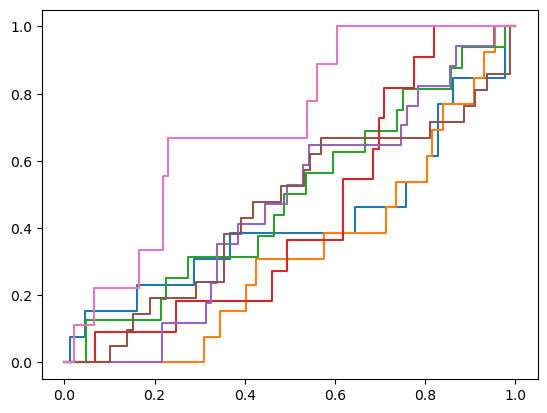

In [22]:
# ÁªòÂà∂ÊØè‰∏™Á±ªÂà´ÁöÑROCÊõ≤Á∫ø
for i in range(n_classes):
    line, = plt.plot(fpr[i], tpr[i], label=f'Class {i} AUC = {roc_auc[i]:.2f}')
    handles.append(line)
    labels.append(f'Class {i} AUC = {roc_auc[i]:.2f}')

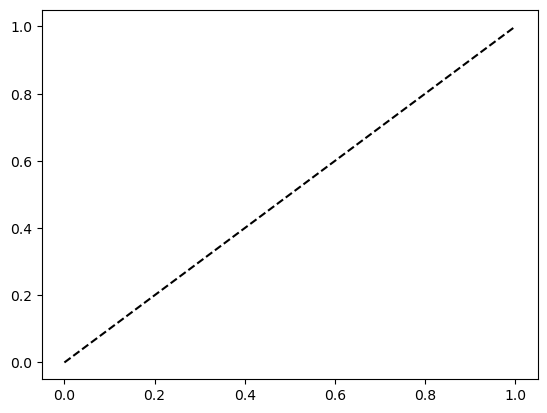

In [23]:
# ÁªòÂà∂ÂØπËßíÁ∫øÔºàÈöèÊú∫ÂàÜÁ±ªÂô®ÁöÑÊõ≤Á∫øÔºâ
line, = plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
handles.append(line)
labels.append('Random Classifier')

Text(0.5, 1.0, 'ROC Curve for Multi-Class Classification')

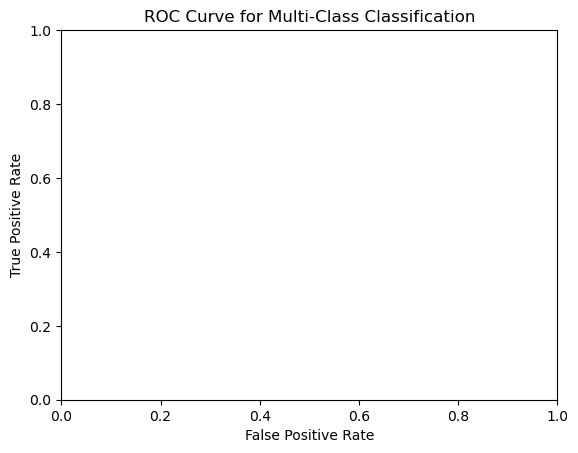

In [24]:
# ËÆæÁΩÆÂõæÂΩ¢ÁöÑÊ†áÈ¢òÂíåÊ†áÁ≠æ
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')

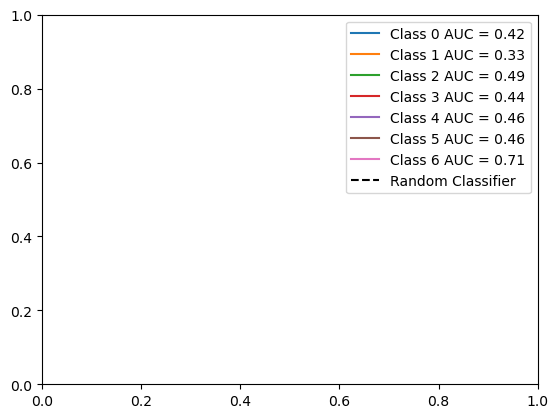

In [25]:
# ÊòæÂºè‰º†ÈÄíÂõæ‰æãÂè•ÊüÑÂíåÊ†áÁ≠æ
plt.legend(handles=handles, labels=labels, loc='best')

In [26]:
# Âú® Jupyter Notebook ‰∏≠ÂêØÁî®ÂõæÂΩ¢ÊòæÁ§∫
%matplotlib inline

In [27]:
# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

In [28]:
# Âä†ËΩΩÈ¢ÑÊµãÈõÜÊï∞ÊçÆ
# ËØªÂèñÊñá‰ª∂Êó∂ÊâìÂç∞Âá∫ËØªÂèñÁöÑË°åÊï∞
with open('predict.txt', 'r') as file:
    lines = file.readlines()
    print(f"Total lines in file: {len(lines)}")
    for i, line in enumerate(lines):
        print(f"Line {i}: {line}")

Total lines in file: 459
Line 0: Area,KeyWords,Name,Verified,Language,Content

Line 1:  ÁªèÊµé,high-speed rail china,Cata Paul,t,en, China's High Speed Rail Evolution Courtesy of @Civixplorer

Line 2:  ÁªèÊµé,express delivery china,Mem #CaffeCinos,f,en,This guy use to be the delivery driver for China express on William barefoot 

Line 3:  ÁªèÊµé,high-speed rail china,Dean Baker,f,en,I believe China has more high-speed rail than the rest of the world combined

Line 4:  ÁªèÊµé,high-speed rail china,–°–ª–∞–≤–∞ –£–∫—Ä–∞—ó–Ω—ñ!!,f,en,China's high-speed rail crew

Line 5:  ÁªèÊµé,high-speed rail china,China Perspective,t,en,High-Speed Rail Station in the Mountains  #China

Line 6:  ÁªèÊµé,China trade ,JabroniCoin.USD,f,en,Looks like the China trade has teppered off

Line 7:  ÁªèÊµé,high-speed rail china,Tent manufacturer ~ Wang Wenda,f,en,China's high-speed rail ranks first in the world

Line 8:  ÁªèÊµé,high-speed rail china,sriramnat,f,en,China Sees More Stations Shut Down as High-Speed Rai

In [29]:
# Âä†ËΩΩÈ¢ÑÊµãÈõÜÊï∞ÊçÆ
predict_df = pd.read_csv('predict.txt', header=None, names=['Content'], on_bad_lines='skip')

In [30]:
# ÊèêÂèñÈ¢ÑÊµãÊñáÊú¨ÁâπÂæÅ
X_predict = vectorizer.transform(predict_df['Content']).toarray()

In [31]:
# ËøõË°åÈ¢ÑÊµã
y_predict = model.predict(X_predict)

In [32]:
# Â∞ÜÈ¢ÑÊµãÁªìÊûúËΩ¨Âåñ‰∏∫Á±ªÂà´ÂêçÁß∞
predicted_labels = label_encoder.inverse_transform(y_predict)

In [33]:
# ËæìÂá∫È¢ÑÊµãÁªìÊûú
predict_df['Predicted Area'] = predicted_labels
print(predict_df[['Content', 'Predicted Area']].head())

                                                                                                         Content  \
Area KeyWords               Name            Verified Language                                            Content   
 ÁªèÊµé  high-speed rail china  Cata Paul       t        en         China's High Speed Rail Evolution Courtesy of...   
     express delivery china Mem #CaffeCinos f        en        This guy use to be the delivery driver for Chi...   
     high-speed rail china  Dean Baker      f        en        I believe China has more high-speed rail than ...   
                            –°–ª–∞–≤–∞ –£–∫—Ä–∞—ó–Ω—ñ!! f        en                             China's high-speed rail crew   

                                                              Predicted Area  
Area KeyWords               Name            Verified Language             ÊñáÂåñ  
 ÁªèÊµé  high-speed rail china  Cata Paul       t        en                   ÁªèÊµé  
     express delivery china Mem #Caffe